In [265]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.objects as so
from seaborn import axes_style
import json
%matplotlib inline

In [266]:
data = pd.read_csv('routes.csv', dtype={'id': str, 'startTime': 'Int64', 'origin': object, 'destination': object, 'route': object, 'totalPower': float, 'chargingStations': object, 'minimumCapacity': float, 'chargeLevelInterval': float, 'financialCostPath': object, 'optimizedCost': float, 'optimizedCostDuration': float, 'durationPath': object, 'optimizedDuration': float, 'optimizedDurationFinancialCost': float, 'endTime': 'Int64', 'error': object})
data.index.name = 'Index'
data.head()

,id,startTime,origin,destination,route,totalPower,chargingStations,minimumCapacity,chargeLevelInterval,financialCostPath,optimizedCost,optimizedCostDuration,durationPath,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,,,,,
0,901a46fae66,1685117702307,"{""latitude"":58.4948961905085,""longitude"":15.93...","{""latitude"":58.53150705900772,""longitude"":15.7...","{""geometry"":{""coordinates"":[[15.932443,58.4933...",2013.489924,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,2122.4,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",2122.4,0.0,1685117763938,NaN
1,934d4d47a03,1685103721651,"{""latitude"":56.65562318302232,""longitude"":15.0...","{""latitude"":56.83923771984071,""longitude"":15.1...","{""geometry"":{""coordinates"":[[15.089618,56.6566...",3994.521630,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,3036.8,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",3036.8,0.0,1685103753578,NaN
2,013218a0647,1684866301725,"{""latitude"":57.34957577123395,""longitude"":14.6...","{""latitude"":57.33213511150875,""longitude"":15.3...","{""geometry"":{""coordinates"":[[14.680002,57.3502...",5282.261753,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,3828.6,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",3828.6,0.0,1684866383785,NaN
3,26bd020f53d,1684866963856,"{""latitude"":56.920744776437836,""longitude"":15....","{""latitude"":56.62026305251856,""longitude"":14.9...","{""geometry"":{""coordinates"":[[15.146871,56.9246...",5466.995023,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,4035.6,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",4035.6,0.0,1684866965595,NaN
4,ed218d23ac4,1685135522529,"{""latitude"":60.27798530517961,""longitude"":13.1...","{""latitude"":59.90993621349289,""longitude"":12.9...","{""geometry"":{""coordinates"":[[13.117959,60.2807...",5549.230183,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,4213.5,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",4213.5,0.0,1685135619828,NaN


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              247 non-null    object 
 1   startTime                       247 non-null    Int64  
 2   origin                          247 non-null    object 
 3   destination                     247 non-null    object 
 4   route                           247 non-null    object 
 5   totalPower                      247 non-null    float64
 6   chargingStations                247 non-null    object 
 7   minimumCapacity                 247 non-null    float64
 8   chargeLevelInterval             247 non-null    float64
 9   financialCostPath               160 non-null    object 
 10  optimizedCost                   160 non-null    float64
 11  optimizedCostDuration           160 non-null    float64
 12  durationPath                    143 

In [268]:
data['Route Duration'] = data.apply(lambda r: json.loads(r['route'])['duration'], axis=1)
data['Route Distance'] = data.apply(lambda r: json.loads(r['route'])['distance'], axis=1)
data['Route Distance (km)'] = data.apply(lambda r: json.loads(r['route'])['distance']/1000, axis=1)
data['Total Power (kW)'] = data.apply(lambda r: r['totalPower']/1000, axis=1)


In [269]:
data.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance,Route Distance (km),Total Power (kW)
count,247.0,247.000000,247.0,247.0,160.000000,160.000000,143.000000,143.000000,152.0,247.000000,247.000000,247.000000,247.000000
mean,1684903497473.388672,34790.149694,43.0,50.0,77.595180,16086.380875,14687.474660,83.775063,1684908257557.282959,15401.634413,299487.537247,299.487537,34.790150
std,224645406.682643,17952.194829,0.0,0.0,75.001591,8318.262549,7578.210940,84.425180,213334951.081249,6846.721858,145236.040318,145.236040,17.952195
min,1684487402321.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684487461279.0,2032.600000,21143.800000,21.143800,2.013490
25%,1684866129054.0,21145.106972,43.0,50.0,0.000000,9391.575000,8833.200000,0.000000,1684868466336.5,10071.000000,184979.800000,184.979800,21.145107
50%,1684926839719.0,33601.041582,43.0,50.0,63.940529,14684.559240,13360.562321,61.544571,1684923066262.5,15138.700000,292695.900000,292.695900,33.601042
75%,1685112930480.5,45709.592069,43.0,50.0,121.498577,21498.189486,19398.030314,134.159036,1685111735926.5,20333.650000,388462.900000,388.462900,45.709592
max,1685172182051.0,87259.953318,43.0,50.0,319.100268,37951.907247,33709.708045,315.179604,1685170383617.0,33354.700000,669441.600000,669.441600,87.259953


In [270]:
successful = data[data['optimizedDuration'].notnull()]
successful.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance,Route Distance (km),Total Power (kW)
count,143.0,143.000000,143.0,143.0,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000
mean,1684914102145.846191,24758.047079,43.0,50.0,71.173738,15411.057919,14687.474660,83.775063,1684914820466.244873,11987.386014,220747.299301,220.747299,24.758047
std,205490597.353076,12096.935100,0.0,0.0,71.209087,8164.739544,7578.210940,84.425180,205758266.816755,5577.334420,106914.869522,106.914870,12.096935
min,1684487402321.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684487461279.0,2032.600000,21143.800000,21.143800,2.013490
25%,1684868866731.5,16046.227379,43.0,50.0,0.000000,8833.200000,8833.200000,0.000000,1684869075554.0,8019.500000,145816.950000,145.816950,16.046227
50%,1684922277073.0,24497.966676,43.0,50.0,54.481312,13821.712111,13360.562321,61.544571,1684925092994.0,11019.200000,215009.500000,215.009500,24.497967
75%,1685107799074.5,34419.564260,43.0,50.0,117.953942,20909.182224,19398.030314,134.159036,1685109337053.5,15480.300000,293947.550000,293.947550,34.419564
max,1685168641833.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685170383617.0,26068.300000,471896.500000,471.896500,51.990844


In [271]:
successful['Cost-Optimized Charging Stops'] = successful.apply(lambda r: json.loads(r['financialCostPath'])[-1]['chargingStops'], axis=1)
successful['Cost-Optimized Charging kW'] = successful.apply(lambda r: json.loads(r['financialCostPath'])[-1]['chargingKw'], axis=1)
successful['Duration-Optimized Charging Stops'] = successful.apply(lambda r: json.loads(r['durationPath'])[-1]['chargingStops'], axis=1)
successful['Duration-Optimized Charging kW'] = successful.apply(lambda r: json.loads(r['durationPath'])[-1]['chargingKw'], axis=1)

successful.describe()

/var/folders/gk/ykxccjhn2fxcz4p50vq0p2t00000gn/T/ipykernel_1526/3147440445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['Cost-Optimized Charging Stops'] = successful.apply(lambda r: json.loads(r['financialCostPath'])[-1]['chargingStops'], axis=1)
/var/folders/gk/ykxccjhn2fxcz4p50vq0p2t00000gn/T/ipykernel_1526/3147440445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['Cost-Optimized Charging kW'] = successful.apply(lambda r: json.loads(r['financialCostPath'])[-1]['chargingKw

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance,Route Distance (km),Total Power (kW),Cost-Optimized Charging Stops,Cost-Optimized Charging kW,Duration-Optimized Charging Stops,Duration-Optimized Charging kW
count,143.0,143.000000,143.0,143.0,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1684914102145.846191,24758.047079,43.0,50.0,71.173738,15411.057919,14687.474660,83.775063,1684914820466.244873,11987.386014,220747.299301,220.747299,24.758047,1.286713,12.446164,1.041958,13.139197
std,205490597.353076,12096.935100,0.0,0.0,71.209087,8164.739544,7578.210940,84.425180,205758266.816755,5577.334420,106914.869522,106.914870,12.096935,1.117230,12.460616,0.941037,13.043320
min,1684487402321.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684487461279.0,2032.600000,21143.800000,21.143800,2.013490,0.000000,0.000000,0.000000,0.000000
25%,1684868866731.5,16046.227379,43.0,50.0,0.000000,8833.200000,8833.200000,0.000000,1684869075554.0,8019.500000,145816.950000,145.816950,16.046227,0.000000,0.000000,0.000000,0.000000
50%,1684922277073.0,24497.966676,43.0,50.0,54.481312,13821.712111,13360.562321,61.544571,1684925092994.0,11019.200000,215009.500000,215.009500,24.497967,1.000000,9.545383,1.000000,9.737997
75%,1685107799074.5,34419.564260,43.0,50.0,117.953942,20909.182224,19398.030314,134.159036,1685109337053.5,15480.300000,293947.550000,293.947550,34.419564,2.000000,21.086860,2.000000,21.005000
max,1685168641833.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685170383617.0,26068.300000,471896.500000,471.896500,51.990844,4.000000,46.314295,4.000000,45.635370


In [272]:
unsuccesful = data[data['optimizedDuration'].isnull() & data['endTime'].isnull()]
unsuccesful.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance,Route Distance (km),Total Power (kW)
count,95.0,95.000000,95.0,95.0,17.000000,17.000000,0.0,0.0,0.0,95.000000,95.000000,95.000000,95.000000
mean,1684897064494.399902,49401.800934,43.0,50.0,131.610847,21767.038679,NaN,NaN,<NA>,20185.303158,412543.427368,412.543427,49.401801
std,243096193.695674,15735.434128,0.0,0.0,86.194310,7590.366530,NaN,NaN,<NA>,5717.821784,122592.869230,122.592869,15.735434
min,1684487650236.0,21450.408465,43.0,50.0,23.024323,10720.980471,NaN,NaN,<NA>,9250.400000,182749.900000,182.749900,21.450408
25%,1684568461405.0,36964.827633,43.0,50.0,66.173188,17090.345585,NaN,NaN,<NA>,15578.250000,314683.950000,314.683950,36.964828
50%,1684949222248.0,48679.624234,43.0,50.0,106.238241,19515.966456,NaN,NaN,<NA>,20245.600000,408280.700000,408.280700,48.679624
75%,1685118776506.5,60370.827593,43.0,50.0,184.101790,24475.323350,NaN,NaN,<NA>,24501.600000,504478.650000,504.478650,60.370828
max,1685172182051.0,87259.953318,43.0,50.0,319.100268,37951.907247,NaN,NaN,<NA>,33354.700000,669441.600000,669.441600,87.259953


In [273]:
ended = data[data['endTime'].notnull() & data['optimizedDuration'].isnull()]
ended.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance,Route Distance (km),Total Power (kW)
count,9.0,9.000000,9.0,9.0,0.0,0.0,0.0,0.0,9.0,9.000000,9.000000,9.000000,9.000000
mean,1684802904678.111084,39955.017049,43.0,50.0,NaN,NaN,NaN,NaN,1684803980226.0,19155.966667,357214.700000,357.214700,39.955017
std,306654541.9898,6246.680178,0.0,0.0,NaN,NaN,NaN,NaN,307506289.490067,3037.389030,52741.087118,52.741087,6.246680
min,1684487461302.0,28294.802206,43.0,50.0,NaN,NaN,NaN,NaN,1684487650186.0,15030.400000,265602.800000,265.602800,28.294802
25%,1684503962280.0,38918.599304,43.0,50.0,NaN,NaN,NaN,NaN,1684504163017.0,15883.100000,325563.300000,325.563300,38.918599
50%,1684871042021.0,40962.405554,43.0,50.0,NaN,NaN,NaN,NaN,1684872086504.0,19921.800000,369114.800000,369.114800,40.962406
75%,1685139314624.0,41733.597649,43.0,50.0,NaN,NaN,NaN,NaN,1685142729072.0,21244.800000,388901.300000,388.901300,41.733598
max,1685163991429.0,49955.992098,43.0,50.0,NaN,NaN,NaN,NaN,1685165472628.0,23598.900000,428567.400000,428.567400,49.955992


In [274]:
positiveCost = successful[successful['optimizedCost'] > 0].copy()
positiveCost['Cost-Optimized Cost per kW'] = positiveCost.apply(lambda r: r['optimizedCost']/r['Cost-Optimized Charging kW'], axis=1)
positiveCost['Duration-Optimized Cost per kW'] = positiveCost.apply(lambda r: r['optimizedDurationFinancialCost']/r['Duration-Optimized Charging kW'], axis=1)
positiveCost['Cost-Optimized Charging Duration'] = positiveCost.apply(lambda r: json.loads(r['financialCostPath'])[-1]['chargingDuration'], axis=1)
positiveCost['Duration-Optimized Charging Duration'] = positiveCost.apply(lambda r: json.loads(r['durationPath'])[-1]['chargingDuration'], axis=1)

positiveCost.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,...,Route Distance (km),Total Power (kW),Cost-Optimized Charging Stops,Cost-Optimized Charging kW,Duration-Optimized Charging Stops,Duration-Optimized Charging kW,Cost-Optimized Cost per kW,Duration-Optimized Cost per kW,Cost-Optimized Charging Duration,Duration-Optimized Charging Duration
count,96.0,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,1684924770967.0,31278.645759,43.0,50.0,106.019213,19539.235234,18461.397670,124.789938,1684925699326.135498,14778.331250,...,277.271870,31.278646,1.916667,18.539599,1.552083,19.571928,5.759259,6.346945,1809.482109,946.694545
std,203421962.455552,8811.412371,0.0,0.0,62.018028,6692.577622,6292.494938,74.039063,203750215.722388,4531.283784,...,80.636884,8.811412,0.803501,10.859293,0.723585,11.272562,0.511924,0.611245,1130.717330,698.423187
min,1684508791737.0,18009.221998,43.0,50.0,13.300928,9602.824872,9544.639422,13.300928,1684508828489.0,8134.800000,...,164.691400,18.009222,1.000000,2.145311,1.000000,2.145311,3.500000,5.950000,98.105167,96.682940
25%,1684869566171.25,24352.531762,43.0,50.0,54.297526,13821.164912,13283.957973,60.755685,1684870479694.0,11007.975000,...,213.909225,24.352532,1.000000,9.498881,1.000000,9.712039,5.600000,5.990000,938.085575,479.900467
50%,1684931670709.5,30475.017069,43.0,50.0,96.132755,18484.445072,17128.814862,111.788895,1684933128751.0,14006.200000,...,261.283100,30.475017,2.000000,16.253842,1.000000,17.825776,5.857767,5.992370,1711.466837,759.469329
75%,1685106347581.25,37840.979379,43.0,50.0,144.383229,24571.305993,23006.651209,168.413583,1685108203661.25,18424.625000,...,344.695275,37.840979,3.000000,25.038075,2.000000,25.108493,5.990000,6.429596,2599.583276,1280.035557
max,1685168641833.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685170383617.0,26068.300000,...,471.896500,51.990844,4.000000,46.314295,4.000000,45.635370,7.058804,8.853477,5076.724074,3684.583734


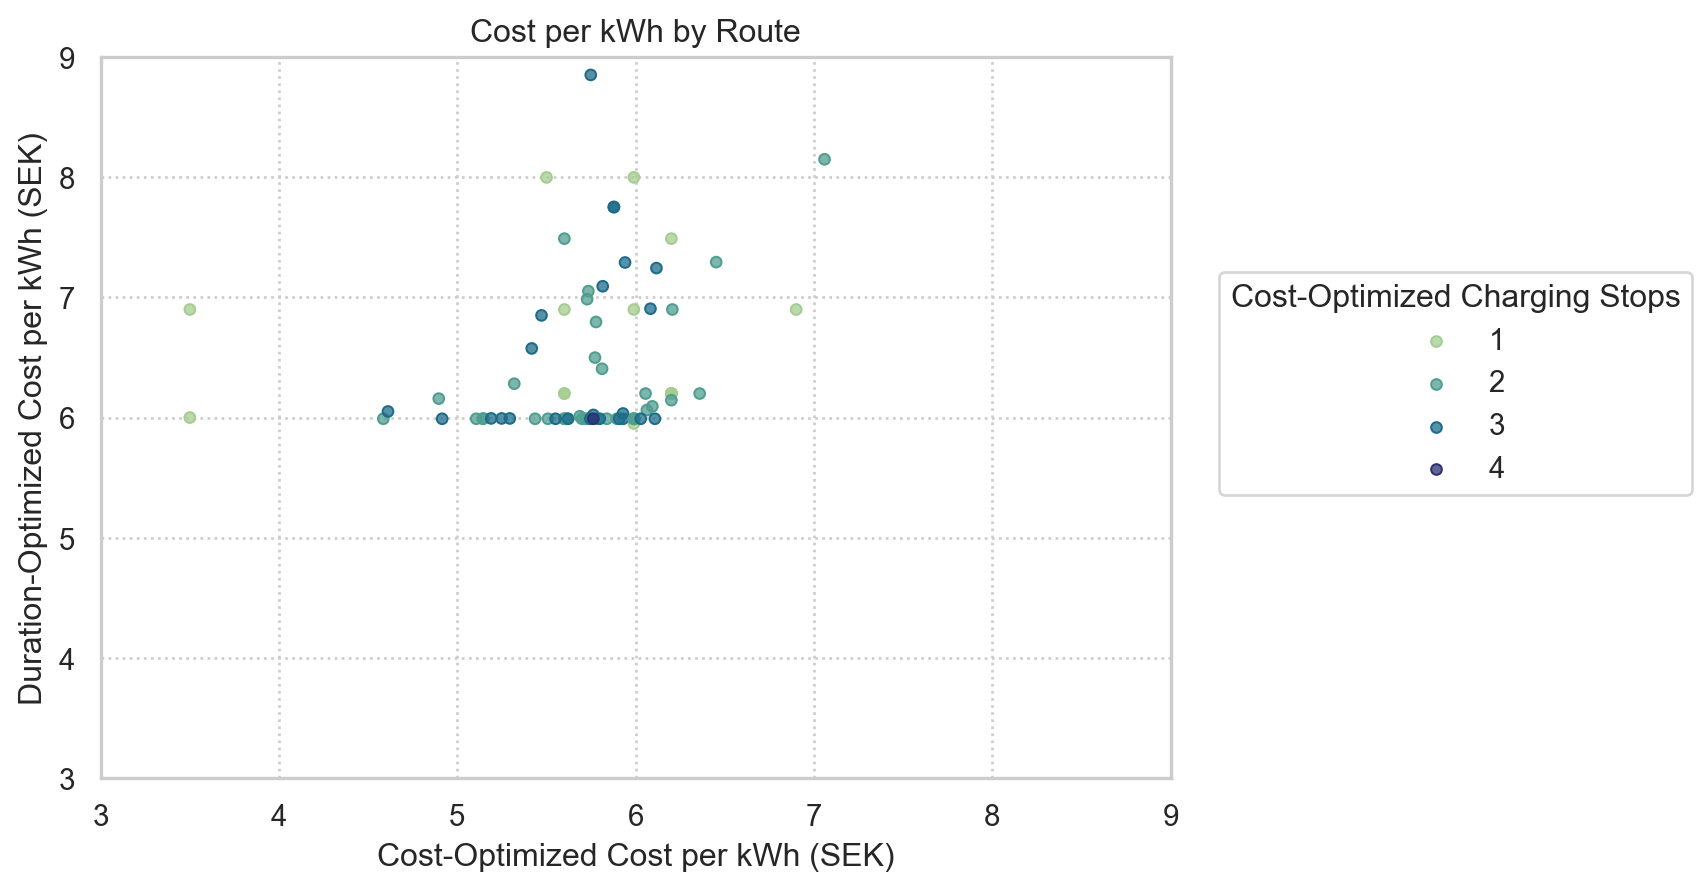

In [297]:
so.Plot(positiveCost, x=positiveCost['Cost-Optimized Cost per kW'], y=positiveCost['Duration-Optimized Cost per kW']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Cost-Optimized Charging Stops").label(x="Cost-Optimized Cost per kWh (SEK)", y="Duration-Optimized Cost per kWh (SEK)", title="Cost per kWh by Route").scale(color="crest").limit(x=(3,9), y=(3,9))

In [276]:
interval_range = pd.interval_range(start=3, end=8, freq=1, closed='left')
cost_costs = pd.cut(positiveCost['Cost-Optimized Cost per kW'], bins=interval_range).value_counts().sort_index()
duration_costs = pd.cut(positiveCost['Duration-Optimized Cost per kW'], bins=interval_range).value_counts().sort_index()

combined = pd.DataFrame(cost_costs).join(duration_costs, lsuffix='_cost_count', rsuffix='_duration_count')
combined.head()
# so.Plot(combined, combined.index).add(so.Bar(), so.Hist())
# sns.histplot(data=combined, x=combined.index)

,count_cost_count,count_duration_count
Cost-Optimized Cost per kW,,
"[3, 4)",2,0
"[4, 5)",4,0
"[5, 6)",70,52
"[6, 7)",19,31
"[7, 8)",1,10


In [277]:

positiveCost.loc[positiveCost['Cost-Optimized Cost per kW'] >= 5].describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,...,Route Distance (km),Total Power (kW),Cost-Optimized Charging Stops,Cost-Optimized Charging kW,Duration-Optimized Charging Stops,Duration-Optimized Charging kW,Cost-Optimized Cost per kW,Duration-Optimized Cost per kW,Cost-Optimized Charging Duration,Duration-Optimized Charging Duration
count,90.0,90.000000,90.0,90.0,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1684924671679.133301,31366.945813,43.0,50.0,107.246116,19492.955103,18447.682450,125.123345,1684925614042.744385,14781.054444,...,277.644111,31.366946,1.911111,18.469818,1.555556,19.560546,5.854255,6.357984,1780.749548,943.499117
std,208431162.918677,8918.179228,0.0,0.0,62.929690,6779.484024,6371.893525,75.284103,208771669.133324,4626.601660,...,81.840787,8.918179,0.802306,11.004740,0.720660,11.423895,0.330444,0.624214,1137.849404,695.479597
min,1684508791737.0,18009.221998,43.0,50.0,13.300928,9602.824872,9544.639422,13.300928,1684508828489.0,8134.800000,...,164.691400,18.009222,1.000000,2.145311,1.000000,2.145311,5.105682,5.950000,98.105167,98.105167
25%,1684871840687.25,24061.661932,43.0,50.0,53.929953,13820.070515,13130.749276,59.177913,1684872457083.75,10985.525000,...,211.708675,24.061662,1.000000,9.405876,1.000000,9.660122,5.615574,5.990000,889.612555,483.607896
50%,1684933128804.5,30475.017069,43.0,50.0,96.132755,18138.087039,16979.818501,109.010202,1684934592290.5,13934.850000,...,261.283100,30.475017,2.000000,15.694440,1.000000,17.397832,5.901388,5.991079,1650.085667,769.366680
75%,1685109250567.75,37902.839770,43.0,50.0,144.407248,24697.962379,23448.617597,168.872554,1685110470445.75,18714.675000,...,345.963825,37.902840,2.750000,25.888016,2.000000,25.862151,5.990000,6.476102,2570.146287,1274.370231
max,1685168641833.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685170383617.0,26068.300000,...,471.896500,51.990844,4.000000,46.314295,4.000000,45.635370,7.058804,8.853477,5076.724074,3684.583734


In [278]:
positiveCost['Nominal Savings'] = positiveCost.apply(lambda r: (r['optimizedDurationFinancialCost'] - r['optimizedCost']), axis=1)
positiveCost['Percentage Savings'] = positiveCost.apply(lambda r: r['Nominal Savings']/r['optimizedDurationFinancialCost'], axis=1)
positiveCost['Time Lost (mins)'] = positiveCost.apply(lambda r: -(r['optimizedDuration'] - r['optimizedCostDuration'])/60, axis=1)

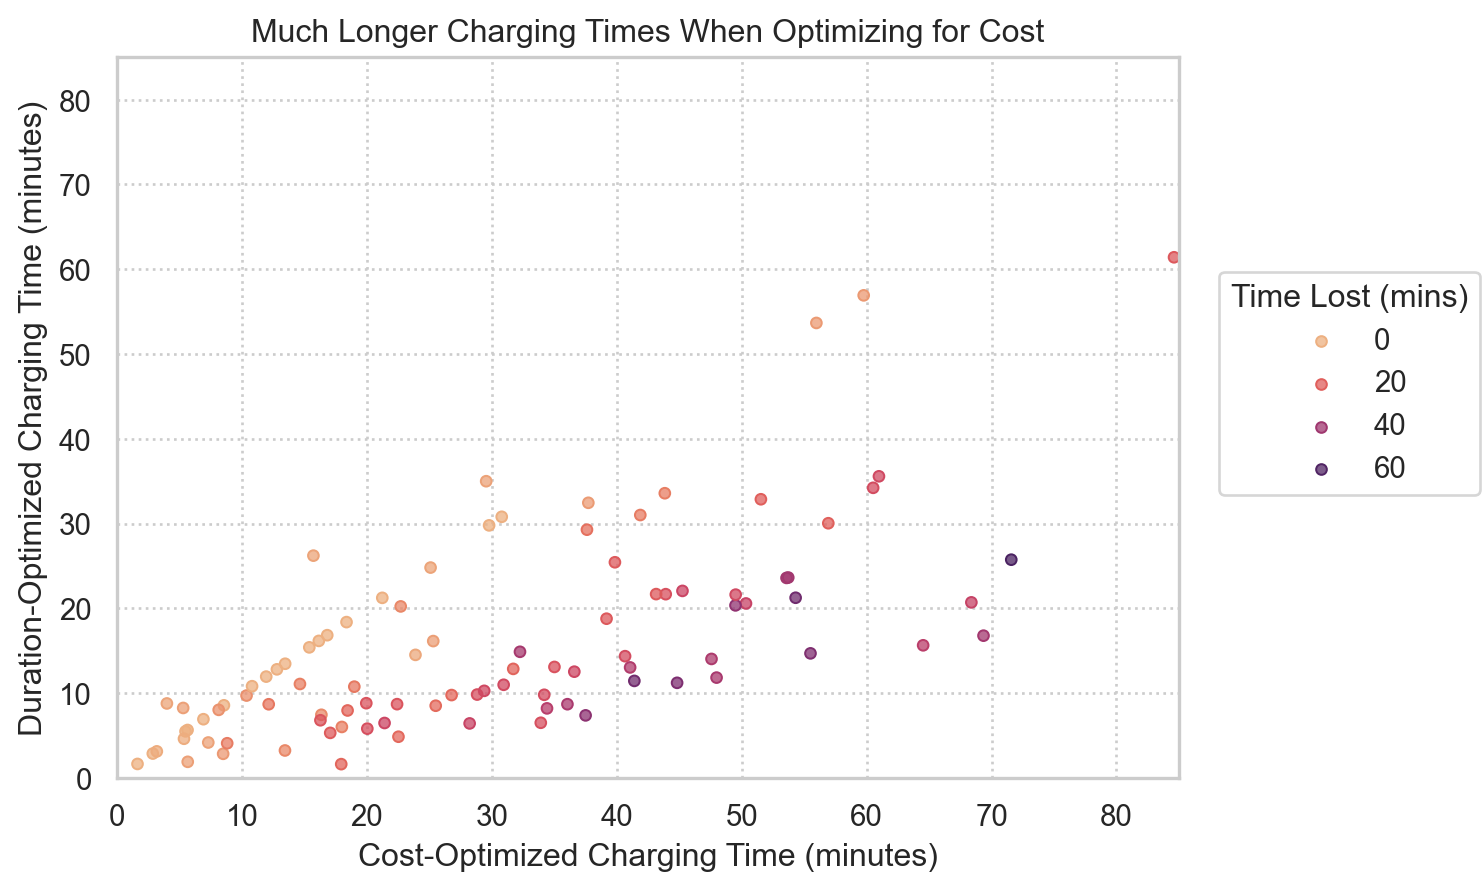

In [279]:
so.Plot(positiveCost, x=positiveCost['Cost-Optimized Charging Duration']/60, y=positiveCost['Duration-Optimized Charging Duration']/60).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Time Lost (mins)").label(x="Cost-Optimized Charging Time (minutes)", y="Duration-Optimized Charging Time (minutes)", title="Much Longer Charging Times When Optimizing for Cost").scale(color="flare").limit(x=(0,85), y=(0,85))

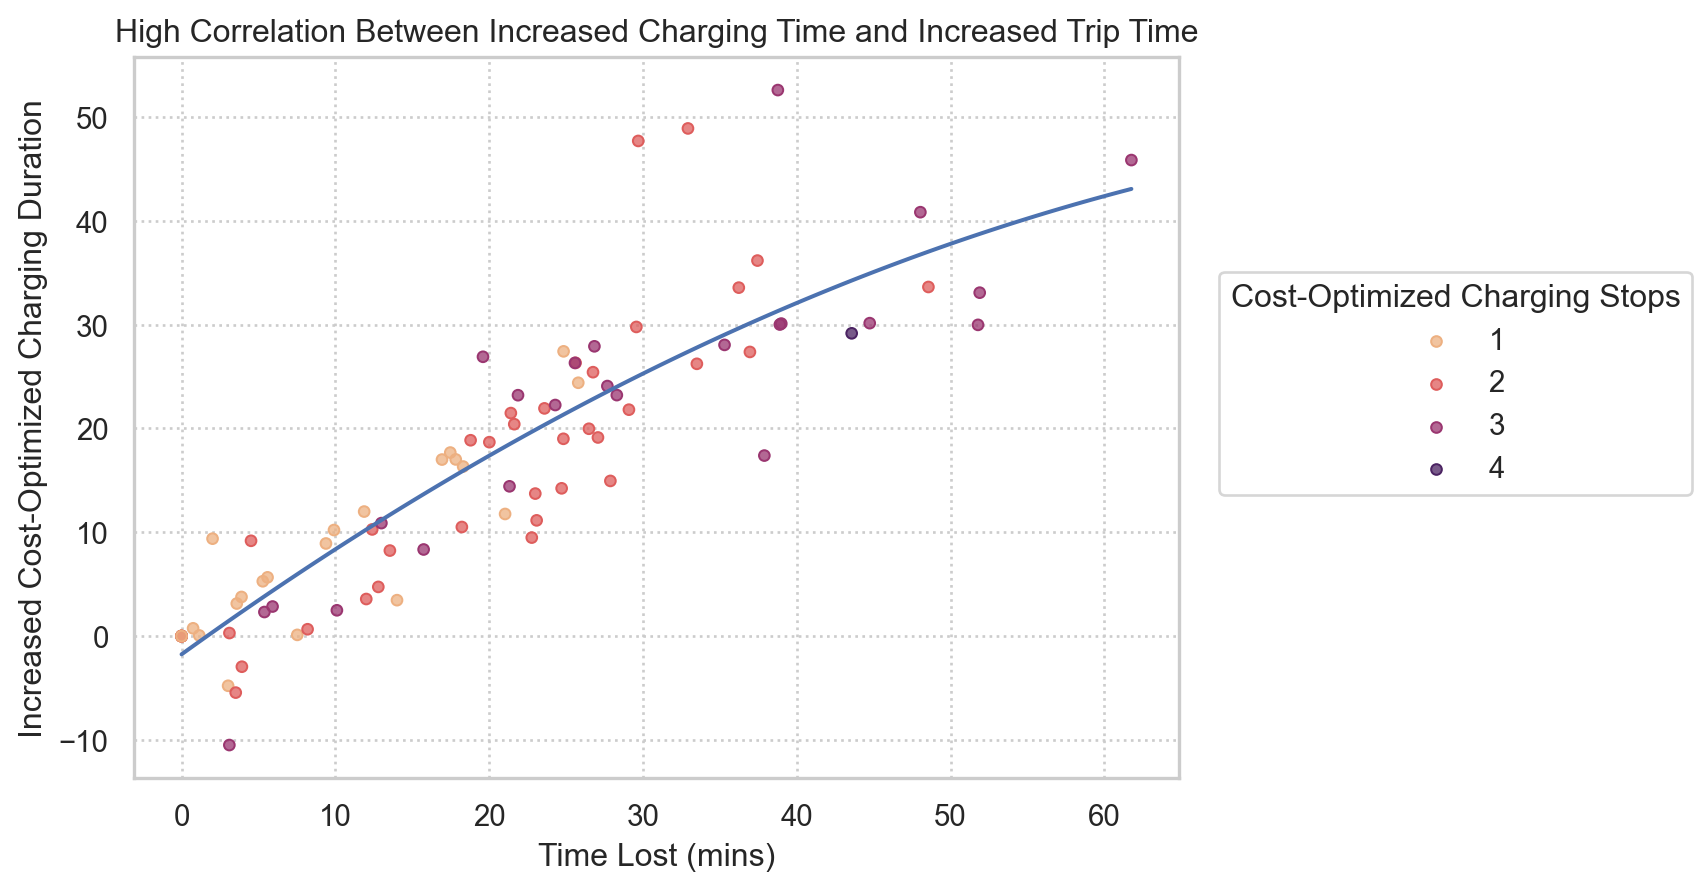

In [280]:
so.Plot(positiveCost, x=positiveCost['Time Lost (mins)'], y=(positiveCost['Cost-Optimized Charging Duration']-positiveCost['Duration-Optimized Charging Duration'])/60).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Cost-Optimized Charging Stops").add(so.Line(), so.PolyFit()).label(x="Time Lost (mins)", y="Increased Cost-Optimized Charging Duration", title="High Correlation Between Increased Charging Time and Increased Trip Time").scale(color="flare")


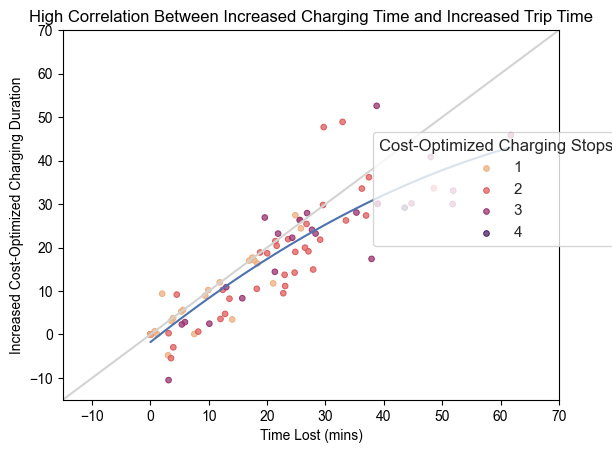

In [281]:
p = so.Plot(positiveCost, x=positiveCost['Time Lost (mins)'], y=(positiveCost['Cost-Optimized Charging Duration']-positiveCost['Duration-Optimized Charging Duration'])/60).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Cost-Optimized Charging Stops").add(so.Line(), so.PolyFit()).label(x="Time Lost (mins)", y="Increased Cost-Optimized Charging Duration", title="High Correlation Between Increased Charging Time and Increased Trip Time").scale(color="flare")

fig, ax = plt.subplots()
plt.xlim(-15, 70)
plt.ylim(-15, 70)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()


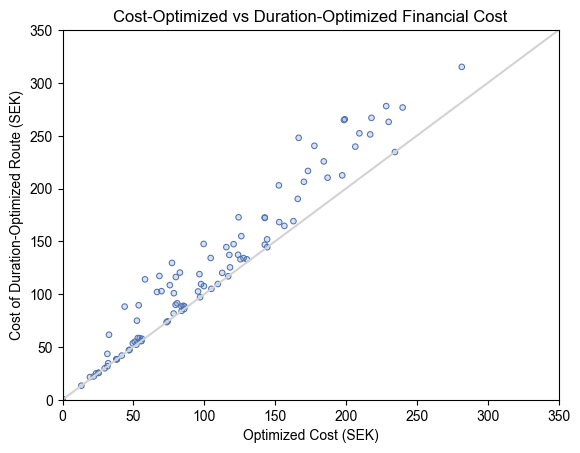

In [282]:
p = so.Plot(successful, x=successful['optimizedCost'], y=successful['optimizedDurationFinancialCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Optimized Cost (SEK)", y="Cost of Duration-Optimized Route (SEK)", color=str.capitalize, title="Cost-Optimized vs Duration-Optimized Financial Cost")

fig, ax = plt.subplots()
plt.xlim(0, 350)
plt.ylim(0, 350)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()

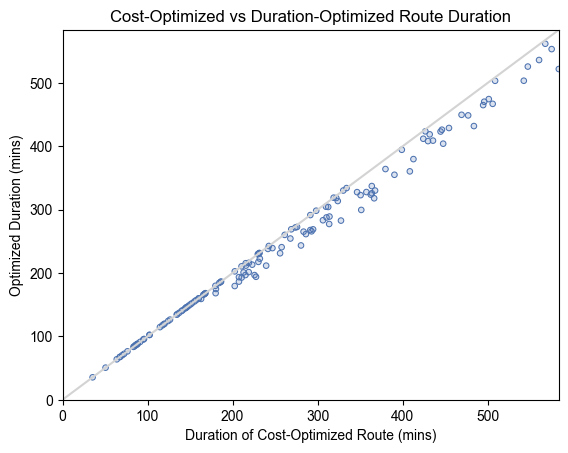

In [283]:
p = so.Plot(successful, x=successful['optimizedCostDuration']/60, y=successful['optimizedDuration']/60).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Duration of Cost-Optimized Route (mins)", y="Optimized Duration (mins)", color=str.capitalize, title="Cost-Optimized vs Duration-Optimized Route Duration")

fig, ax = plt.subplots()
plt.xlim(0, 35000/60)
plt.ylim(0, 35000/60)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()


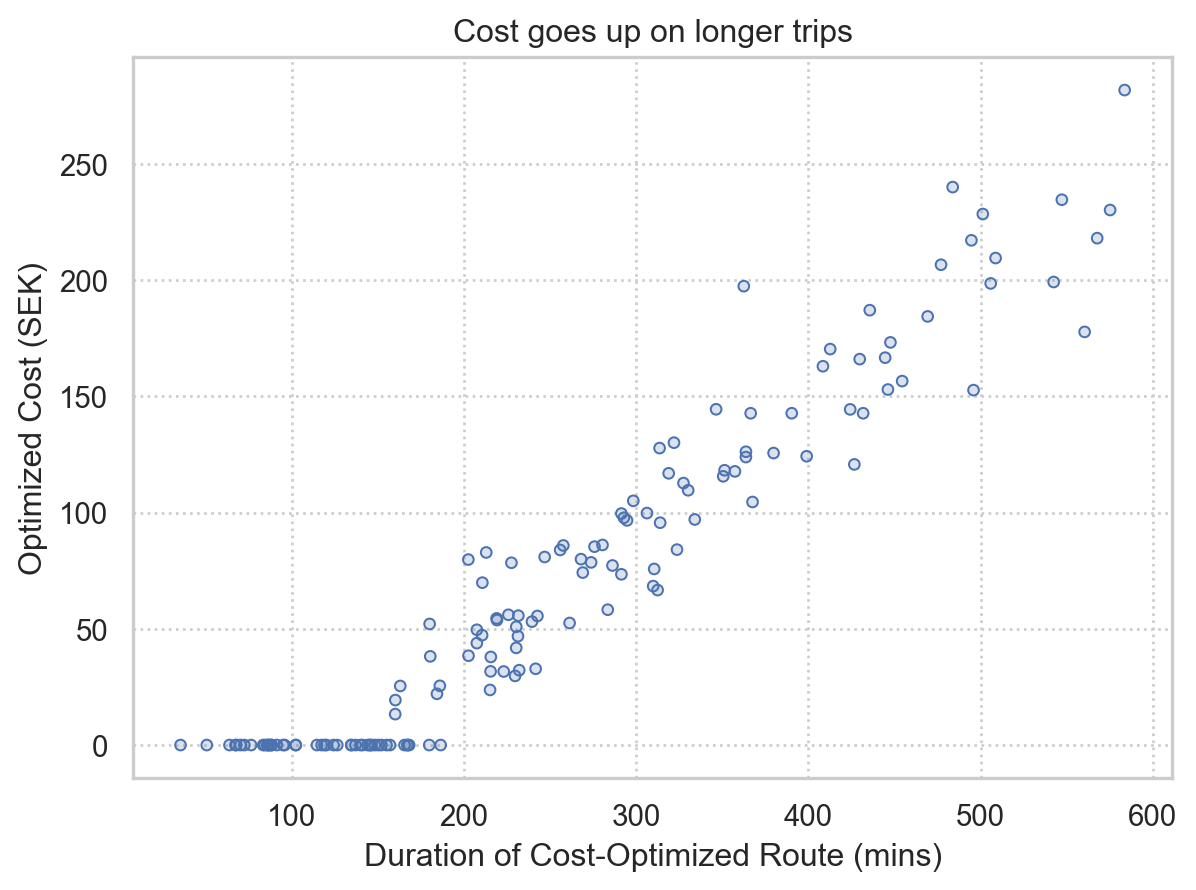

In [284]:
so.Plot(successful, x=successful['optimizedCostDuration']/60, y=successful['optimizedCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Duration of Cost-Optimized Route (mins)", y="Optimized Cost (SEK)", color=str.capitalize, title="Cost goes up on longer trips")


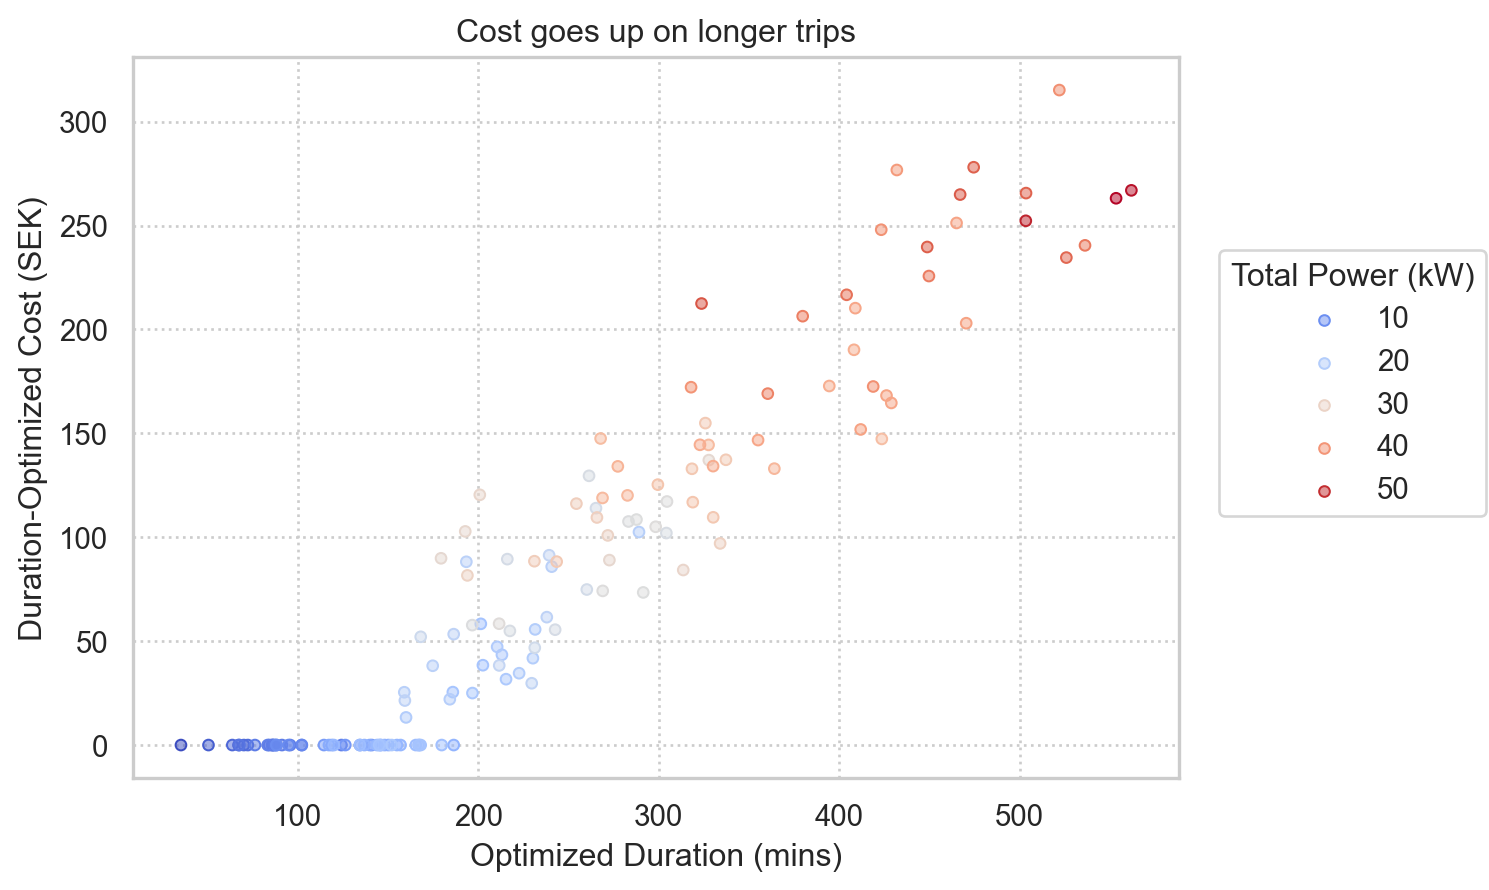

In [285]:
so.Plot(successful, x=successful['optimizedDuration']/60, y=successful['optimizedDurationFinancialCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.5), color="Total Power (kW)").label(x="Optimized Duration (mins)", y="Duration-Optimized Cost (SEK)", color="Total Power (kW)", title="Cost goes up on longer trips").scale(color="coolwarm")


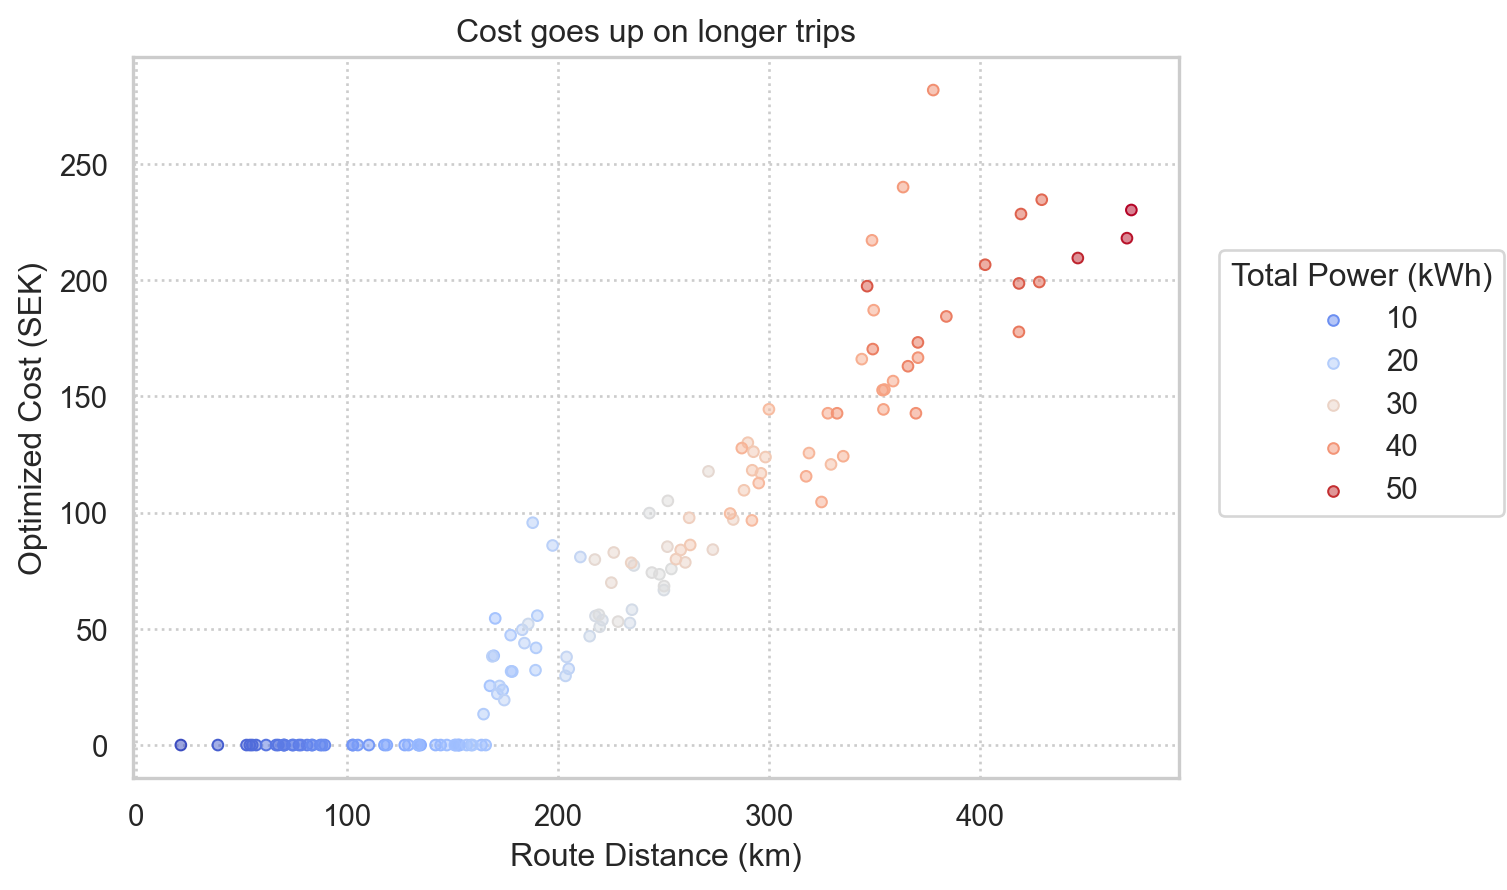

In [286]:
so.Plot(successful, x=successful['Route Distance']/1000, y=successful['optimizedCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.5), color="Total Power (kW)").label(x="Route Distance (km)", y="Optimized Cost (SEK)", color="Total Power (kWh)", title="Cost goes up on longer trips").scale(color="coolwarm")


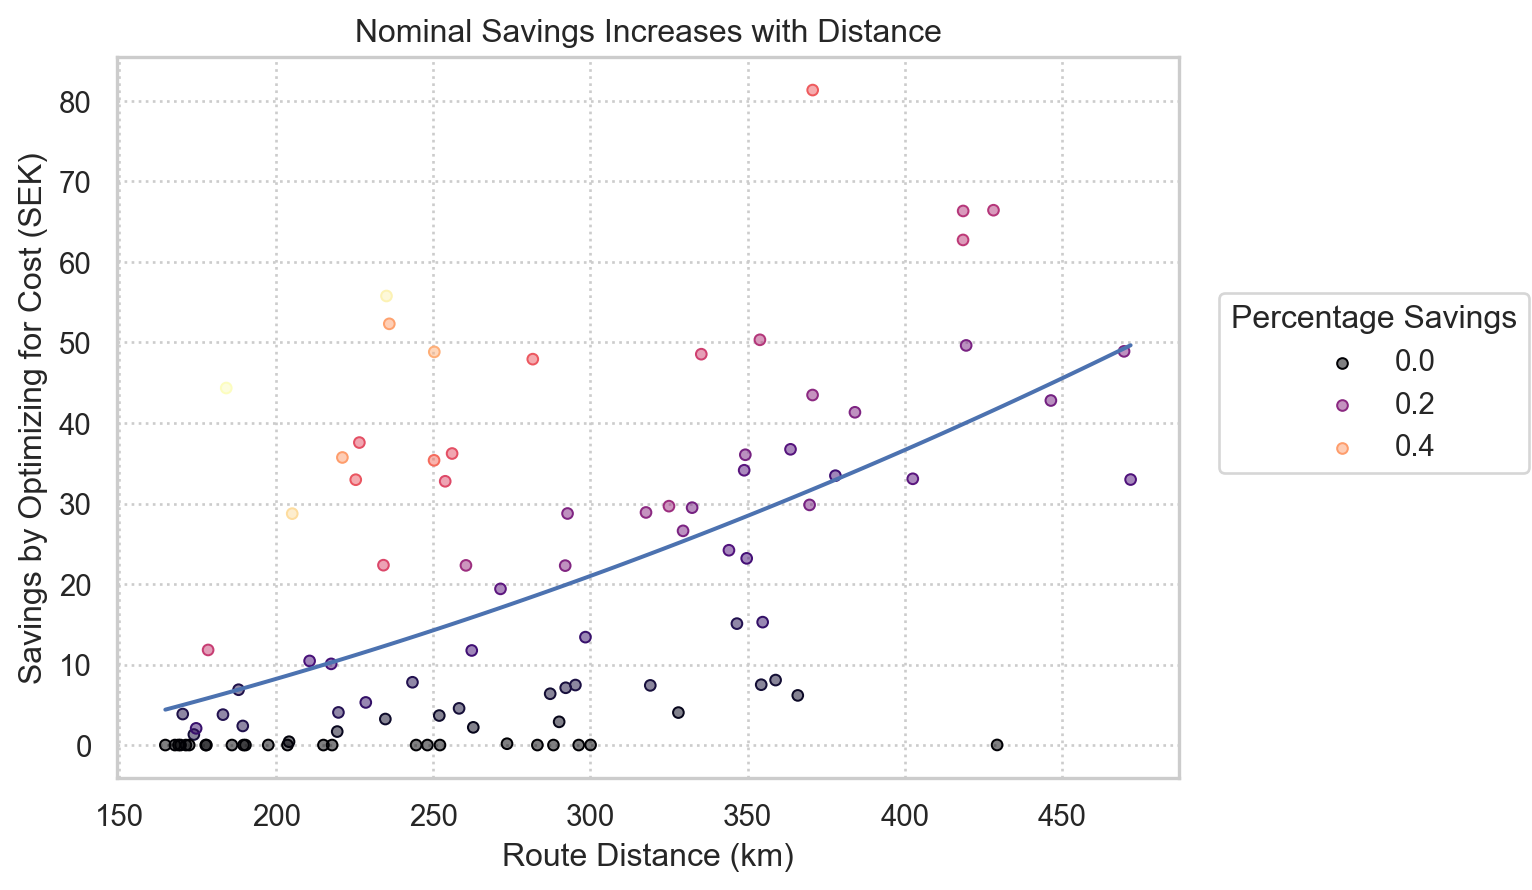

In [287]:
so.Plot(positiveCost, x=positiveCost['Route Distance']/1000, y=positiveCost['Nominal Savings']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.5), color="Percentage Savings").add(so.Line(), so.PolyFit()).label(x="Route Distance (km)", y="Savings by Optimizing for Cost (SEK)", color="Percentage Savings", title="Nominal Savings Increases with Distance").scale(color="magma")


In [288]:
positiveSavings = positiveCost.loc[positiveCost['Nominal Savings'] > 0.5]
positiveSavings.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,...,Cost-Optimized Charging kW,Duration-Optimized Charging Stops,Duration-Optimized Charging kW,Cost-Optimized Cost per kW,Duration-Optimized Cost per kW,Cost-Optimized Charging Duration,Duration-Optimized Charging Duration,Nominal Savings,Percentage Savings,Time Lost (mins)
count,71.0,71.000000,71.0,71.0,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1684903187745.52124,33494.095133,43.0,50.0,119.598796,21027.368402,19648.199967,144.970195,1684904204602.239502,15669.716901,...,21.148021,1.661972,22.546499,5.644904,6.436630,2117.782487,1017.380249,25.371399,0.172909,22.986141
std,216324397.421602,8481.792617,0.0,0.0,60.740439,6602.401606,6350.837281,71.002358,216735008.250513,4507.786651,...,10.525917,0.773557,10.735101,0.540310,0.680436,1108.792453,749.572887,19.438007,0.123484,14.028406
min,1684508791737.0,18009.221998,43.0,50.0,19.347665,9608.889785,9563.895215,21.420629,1684508828489.0,8155.600000,...,3.454940,1.000000,3.454940,3.500000,5.950000,190.907665,96.682940,1.307718,0.021692,0.749909
25%,1684868498465.5,26827.931339,43.0,50.0,76.492354,15515.818166,14484.015406,90.602006,1684868992334.0,12051.200000,...,13.217621,1.000000,14.896371,5.529089,5.990000,1199.459974,506.025429,7.262793,0.069722,12.594032
50%,1684925093054.0,33201.597630,43.0,50.0,115.592331,19648.132713,18275.731989,133.005517,1684926130517.0,14999.900000,...,20.453270,1.000000,20.886382,5.734668,5.993032,2100.725359,781.331113,24.197135,0.137989,23.088660
75%,1685104324839.5,38922.901845,43.0,50.0,164.467305,26024.533031,24921.618462,196.596740,1685105975214.0,19316.500000,...,28.203980,2.000000,30.547276,5.934495,6.900000,2924.894046,1368.932113,36.471348,0.250271,29.632885
max,1685163454975.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685163991391.0,26068.300000,...,46.314295,4.000000,45.635370,7.058804,8.853477,5076.724074,3684.583734,81.352866,0.502840,61.760453


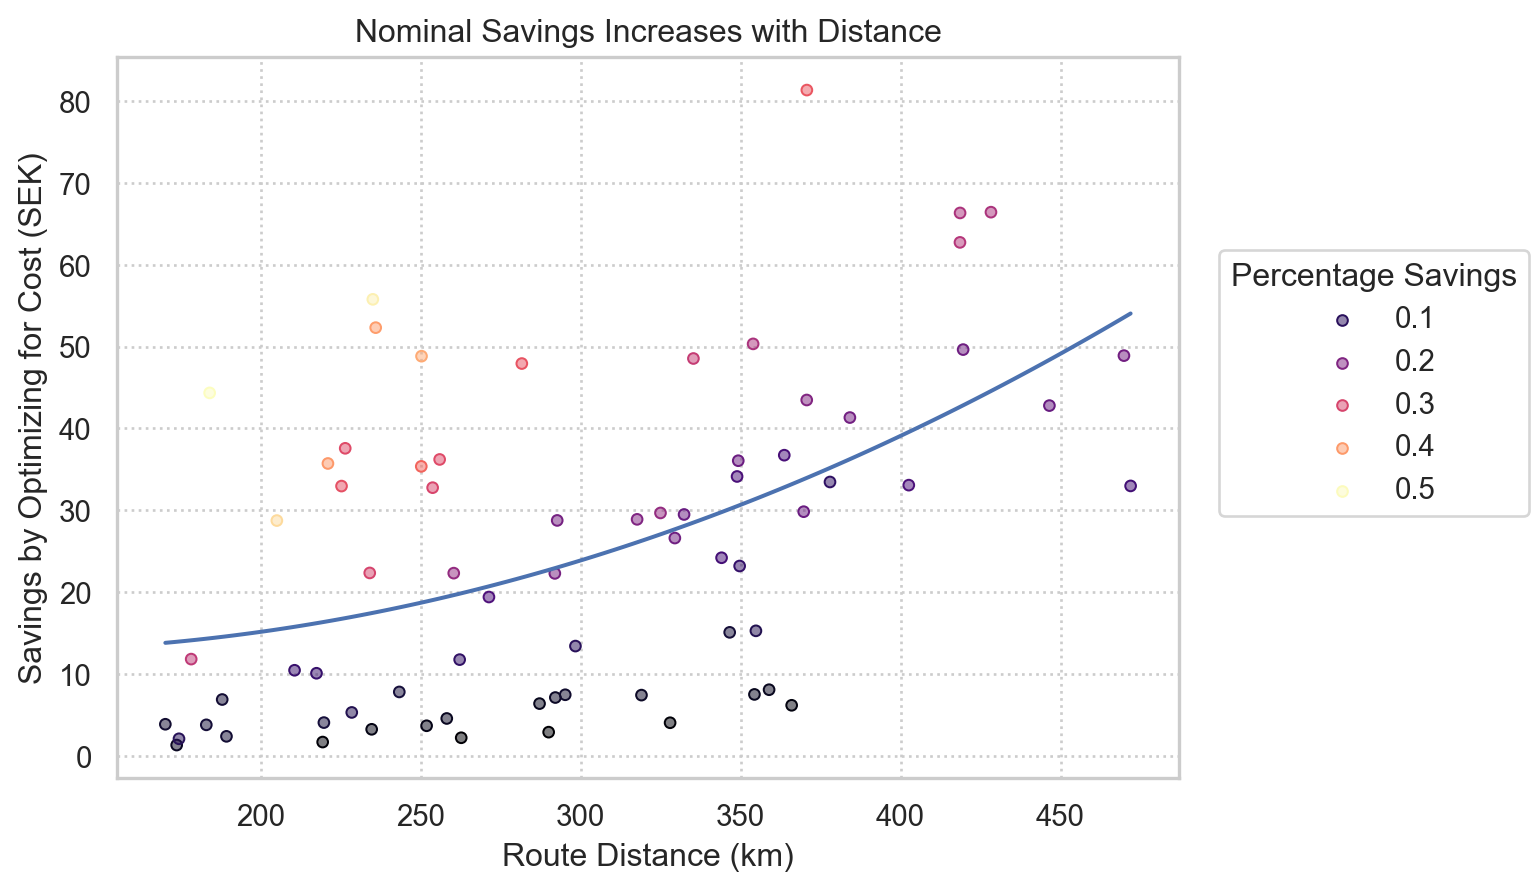

In [289]:
so.Plot(positiveSavings, x=positiveSavings['Route Distance']/1000, y=positiveSavings['Nominal Savings']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.5), color="Percentage Savings").add(so.Line(), so.PolyFit()).label(x="Route Distance (km)", y="Savings by Optimizing for Cost (SEK)", color="Percentage Savings", title="Nominal Savings Increases with Distance").scale(color="magma")


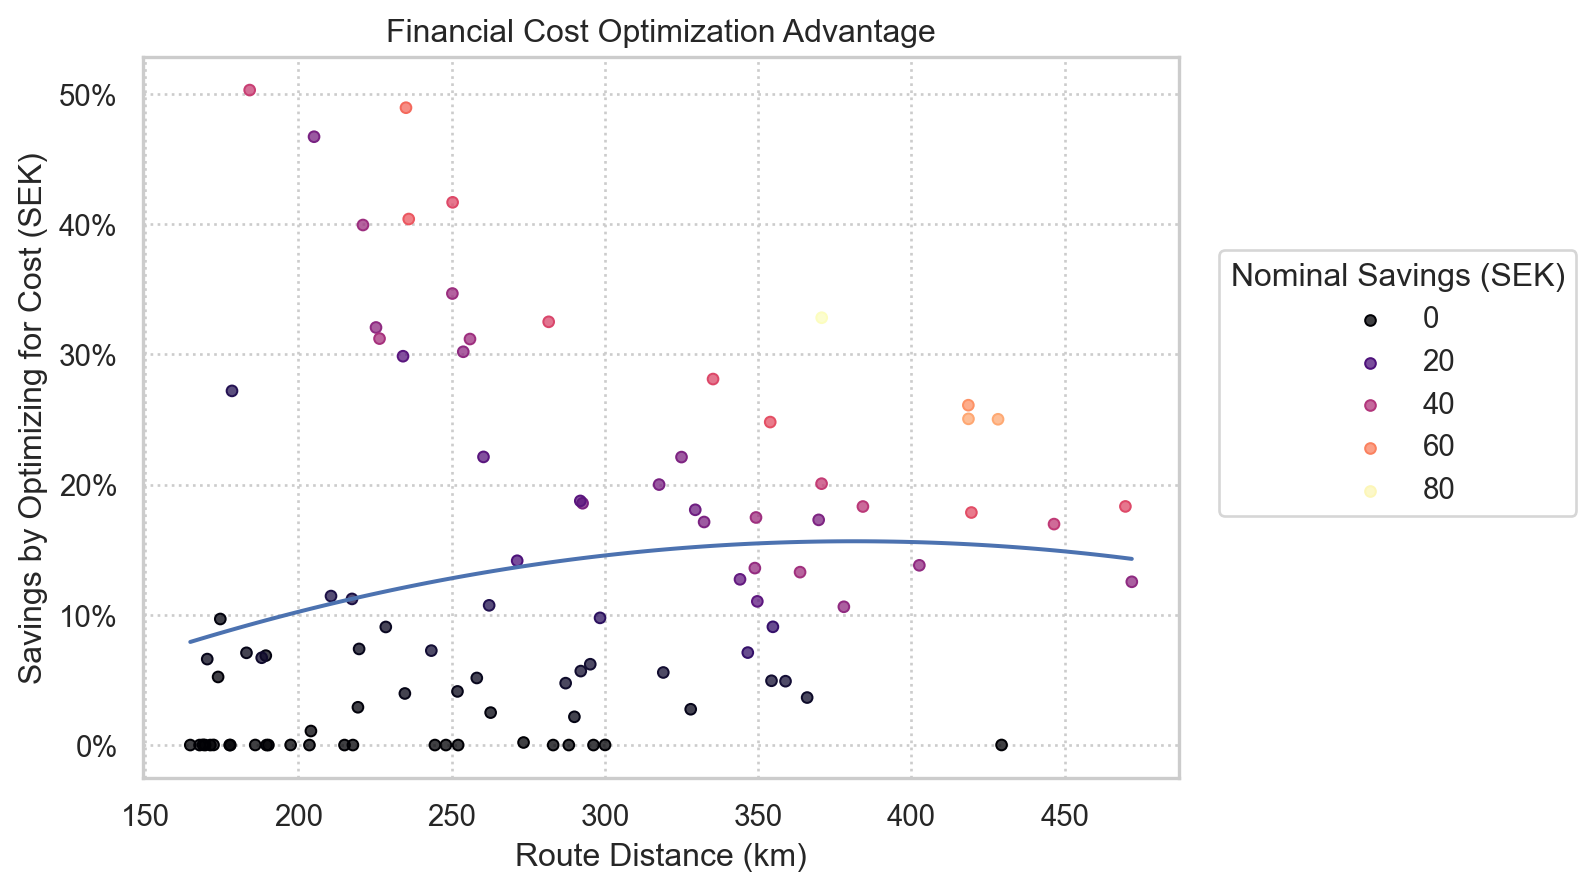

In [290]:
import matplotlib.ticker as ticker
so.Plot(positiveCost, x=positiveCost['Route Distance']/1000, y=positiveCost['Percentage Savings']*100).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Nominal Savings").add(so.Line(), so.PolyFit()).label(x="Route Distance (km)", y="Savings by Optimizing for Cost (SEK)", color="Nominal Savings (SEK)", title="Financial Cost Optimization Advantage").scale(y=so.Continuous().label(formatter=ticker.PercentFormatter()), color="magma")


In [291]:
60*positiveCost['Nominal Savings']/positiveCost['Time Lost (mins)']

Index
44      13.218249
45            NaN
48            NaN
49       4.285382
51            NaN
          ...    
186    102.310118
187     23.338818
202    476.695220
206    495.903131
209     90.446597
Length: 96, dtype: float64

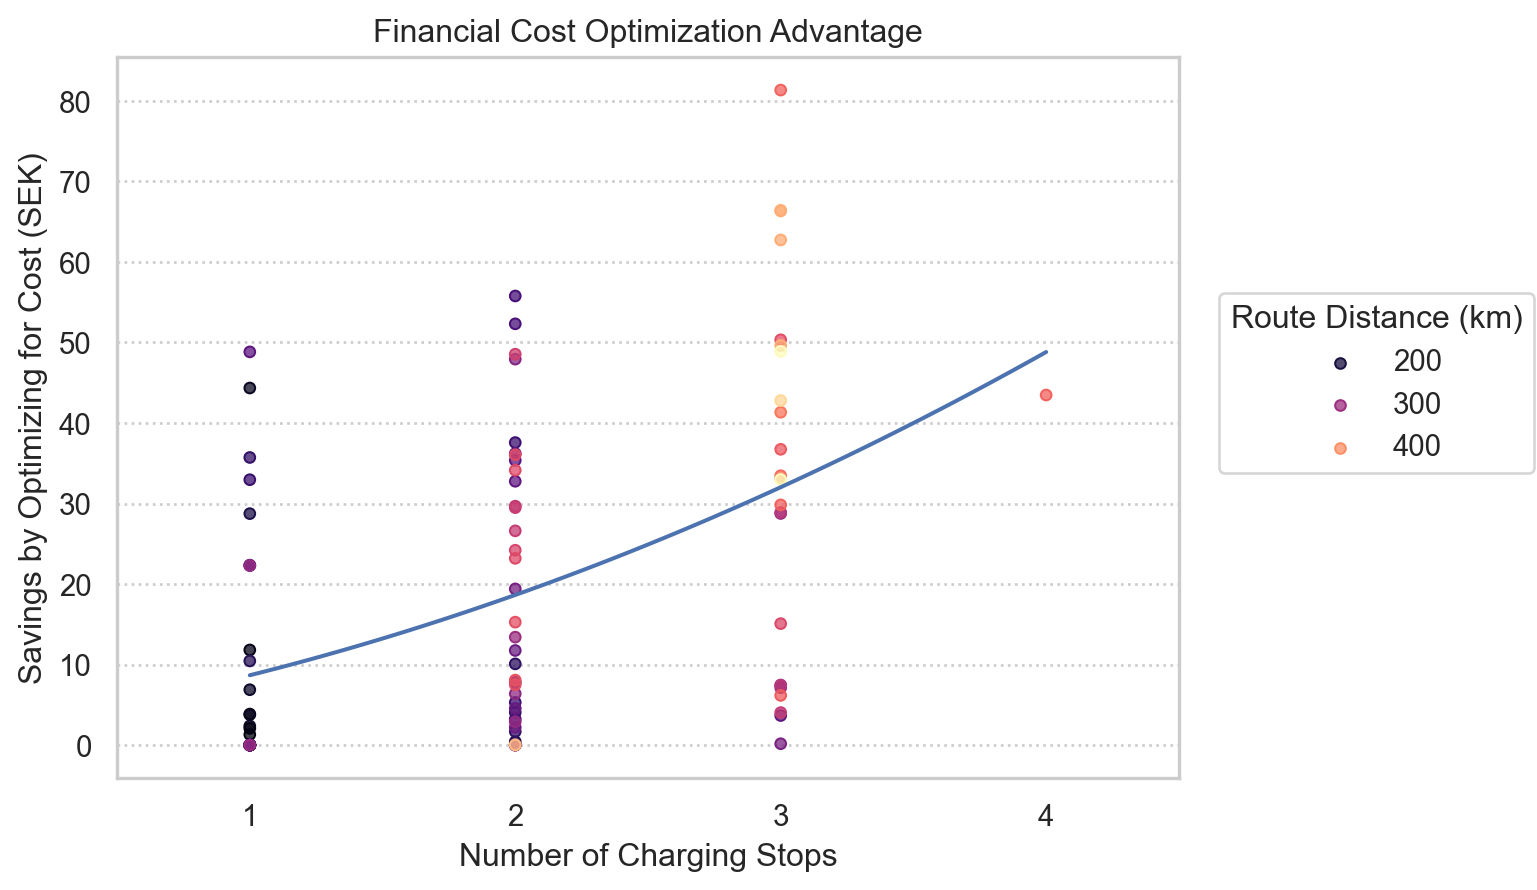

In [300]:
# nominal savings vs charging stops
so.Plot(positiveCost, x=positiveCost['Cost-Optimized Charging Stops'], y=positiveCost['Nominal Savings']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Route Distance (km)").add(so.Line(), so.PolyFit()).label(x="Number of Charging Stops", y="Savings by Optimizing for Cost (SEK)", title="Financial Cost Optimization Advantage").scale(color="magma", x=so.Nominal())

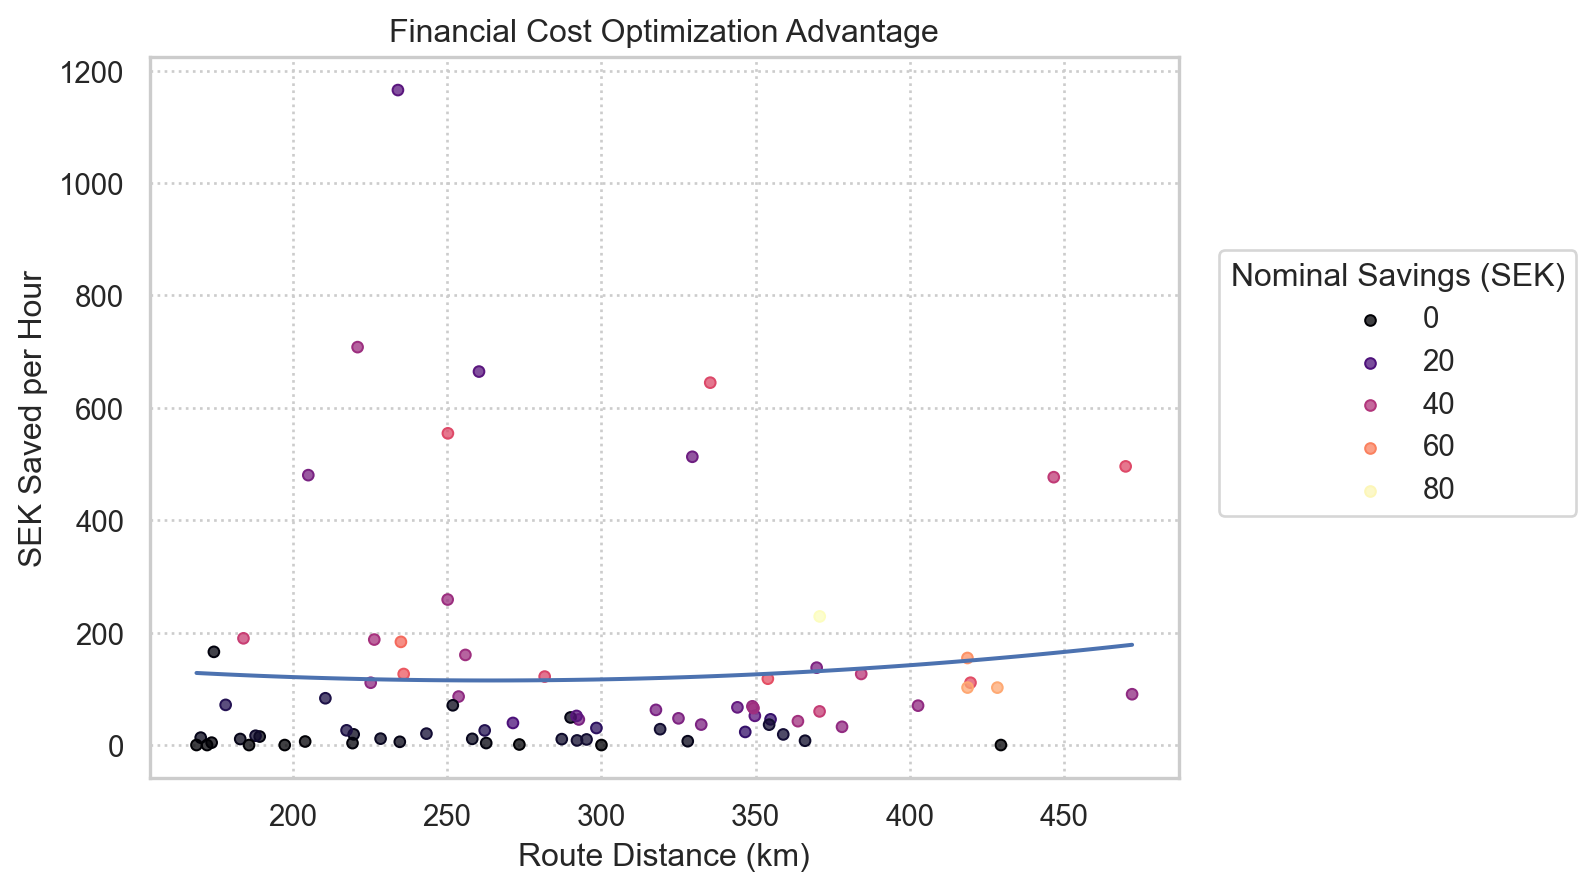

In [293]:
# what is the price per second of savings between the optimized cost and the fastest cost?
so.Plot(positiveCost, x=positiveCost['Route Distance']/1000, y=60*positiveCost['Nominal Savings']/positiveCost['Time Lost (mins)']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots(fillalpha=.75), color="Nominal Savings").add(so.Line(), so.PolyFit()).label(x="Route Distance (km)", y="SEK Saved per Hour", color="Nominal Savings (SEK)", title="Financial Cost Optimization Advantage").scale(color="magma")

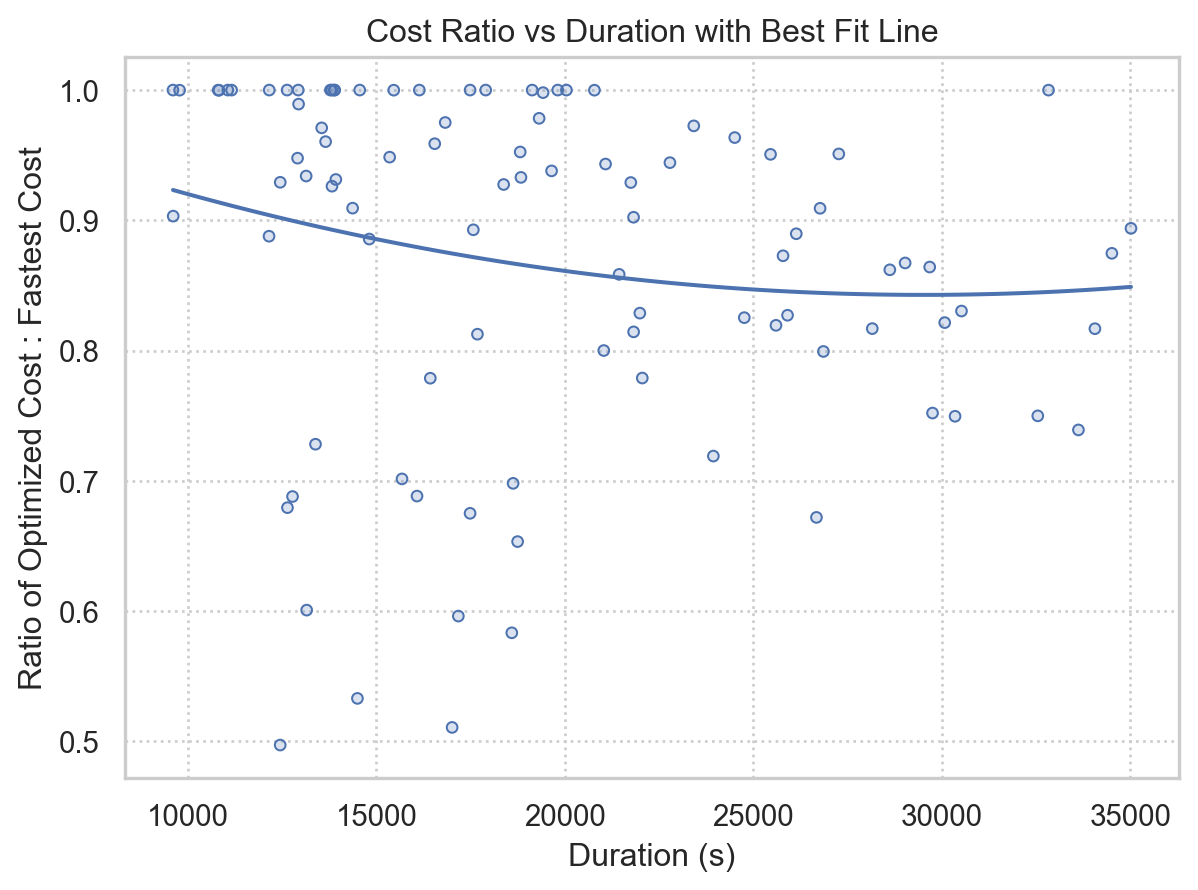

In [294]:

(
    so.Plot(successful, x=successful['optimizedCostDuration'], y=successful['optimizedCost']/successful['optimizedDurationFinancialCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
    .label(
        x="Duration (s)", y="Ratio of Optimized Cost : Fastest Cost",
        color=str.capitalize,
        title="Cost Ratio vs Duration with Best Fit Line",
    )
)

In [295]:
binned = pd.cut((positiveCost['Nominal Savings']/positiveCost['Time Lost (mins)']), bins=15)
binned.value_counts()

(-0.0192, 1.295]    50
(1.295, 2.59]       13
(2.59, 3.885]        6
(7.771, 9.066]       4
(10.361, 11.656]     2
(3.885, 5.18]        1
(9.066, 10.361]      1
(11.656, 12.951]     1
(18.131, 19.426]     1
(5.18, 6.476]        0
(6.476, 7.771]       0
(12.951, 14.246]     0
(14.246, 15.541]     0
(15.541, 16.836]     0
(16.836, 18.131]     0
Name: count, dtype: int64

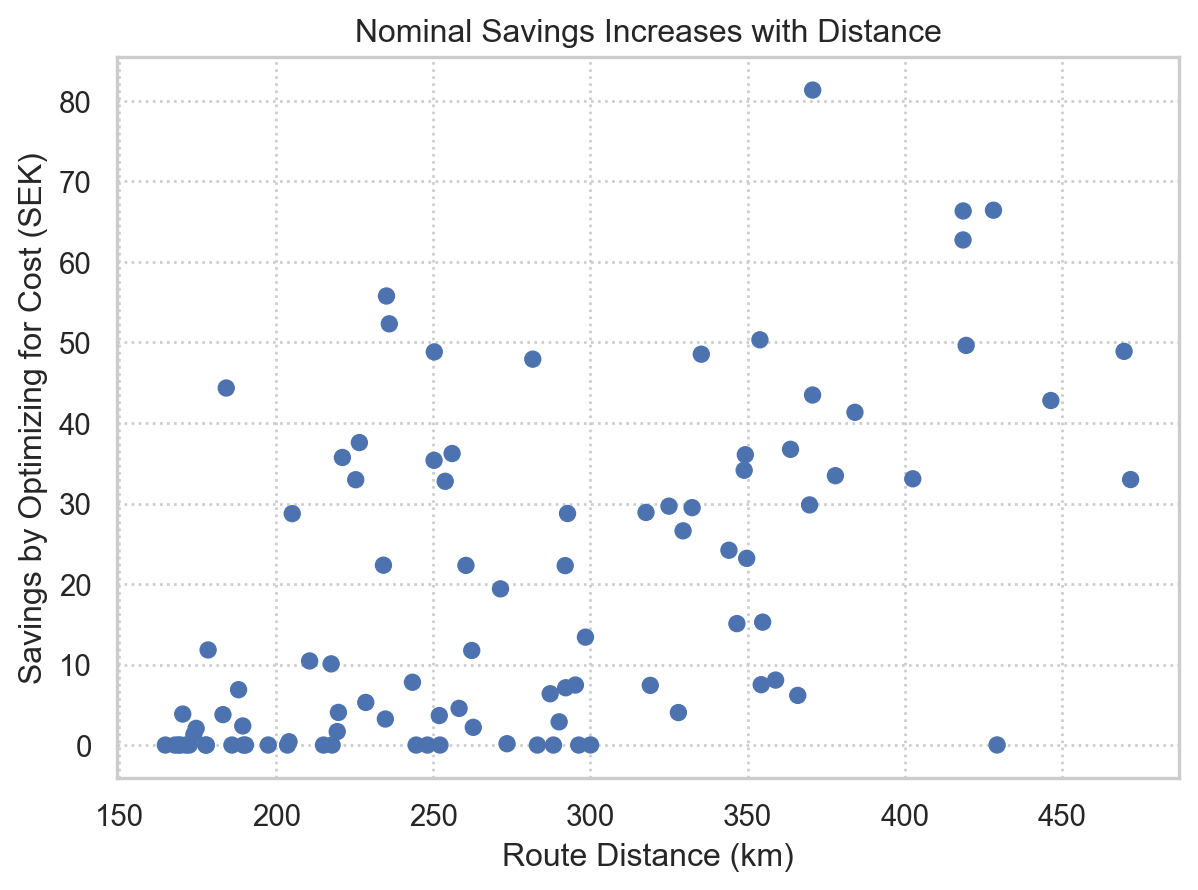

In [296]:
# box plot of nominal savings vs distance

so.Plot(positiveCost, x=positiveCost['Route Distance']/1000, y=positiveCost['Nominal Savings']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dot(), so.Agg(), so.Dodge()).add(so.Range(), so.Est(errorbar="sd"), so.Dodge()).label(x="Route Distance (km)", y="Savings by Optimizing for Cost (SEK)", title="Nominal Savings Increases with Distance")